In [138]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#Read the data set of "Marketing Analysis" in data.
data= pd.read_csv(r"C:/Users/eshu/globalterrorismdb_0718dist.csv",encoding = "ISO-8859-1", engine="python")
data.drop('approxdate',axis=1,inplace=True)
data.drop('resolution',axis=1,inplace=True)
data.drop('addnotes',axis=1,inplace=True)
data.drop('related',axis=1,inplace=True)
data.drop('extended',axis=1,inplace=True)
data.drop('hostkidoutcome_txt',axis=1,inplace=True)
data.drop('nreleased',axis=1,inplace=True)
data.drop('ransomnote',axis=1,inplace=True)
data.drop('hostkidoutcome',axis=1,inplace=True)

data.dropna(axis='columns', how='all')




#Printing the data


data

,eventid,iyear,imonth,iday,country,country_txt,region,region_txt,provstate,city,...,ransompaid,ransompaidus,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,1.970000e+11,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,...,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0
1,1.970000e+11,1970,0,0,130,Mexico,1,North America,Federal,Mexico city,...,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1
2,1.970010e+11,1970,1,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,...,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1
3,1.970010e+11,1970,1,0,78,Greece,8,Western Europe,Attica,Athens,...,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1
4,1.970010e+11,1970,1,0,101,Japan,4,East Asia,Fukouka,Fukouka,...,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2.017120e+11,2017,12,31,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,...,NaN,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0
181687,2.017120e+11,2017,12,31,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,...,NaN,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1
181688,2.017120e+11,2017,12,31,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,...,NaN,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0
181689,2.017120e+11,2017,12,31,92,India,6,South Asia,Manipur,Imphal,...,NaN,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9


In [139]:
import folium 
from folium.plugins import MarkerCluster

In [140]:
# Checking the missing values
data.isnull().sum()

eventid     0
iyear       0
imonth      0
iday        0
country     0
           ..
dbsource    0
INT_LOG     0
INT_IDEO    0
INT_MISC    0
INT_ANY     0
Length: 126, dtype: int64

In [141]:
#Renaming the columns
data.rename(columns={'iyear': 'Year','imonth': 'Month','iday': 'Day','region_txt':'Region','natlty1_txt':'Natlty1','ishostkid':'shostkid','targtype3_txt':'targttype3','targtype2_txt':'targtype2','nwound':'Wounded','gname':'group' },inplace=True)
data


,eventid,Year,Month,Day,country,country_txt,region,Region,provstate,city,...,ransompaid,ransompaidus,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,1.970000e+11,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,...,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0
1,1.970000e+11,1970,0,0,130,Mexico,1,North America,Federal,Mexico city,...,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1
2,1.970010e+11,1970,1,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,...,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1
3,1.970010e+11,1970,1,0,78,Greece,8,Western Europe,Attica,Athens,...,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1
4,1.970010e+11,1970,1,0,101,Japan,4,East Asia,Fukouka,Fukouka,...,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2.017120e+11,2017,12,31,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,...,NaN,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0
181687,2.017120e+11,2017,12,31,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,...,NaN,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1
181688,2.017120e+11,2017,12,31,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,...,NaN,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0
181689,2.017120e+11,2017,12,31,92,India,6,South Asia,Manipur,Imphal,...,NaN,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9


In [142]:
data.head()


,eventid,Year,Month,Day,country,country_txt,region,Region,provstate,city,...,ransompaid,ransompaidus,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,1.970000e+11,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,...,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0
1,1.970000e+11,1970,0,0,130,Mexico,1,North America,Federal,Mexico city,...,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1
2,1.970010e+11,1970,1,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,...,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1
3,1.970010e+11,1970,1,0,78,Greece,8,Western Europe,Attica,Athens,...,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1
4,1.970010e+11,1970,1,0,101,Japan,4,East Asia,Fukouka,Fukouka,...,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1


In [143]:
data.columns

Index(['eventid', 'Year', 'Month', 'Day', 'country', 'country_txt', 'region',
       'Region', 'provstate', 'city',
       ...
       'ransompaid', 'ransompaidus', 'scite1', 'scite2', 'scite3', 'dbsource',
       'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object', length=126)

In [144]:
data1=data.copy()

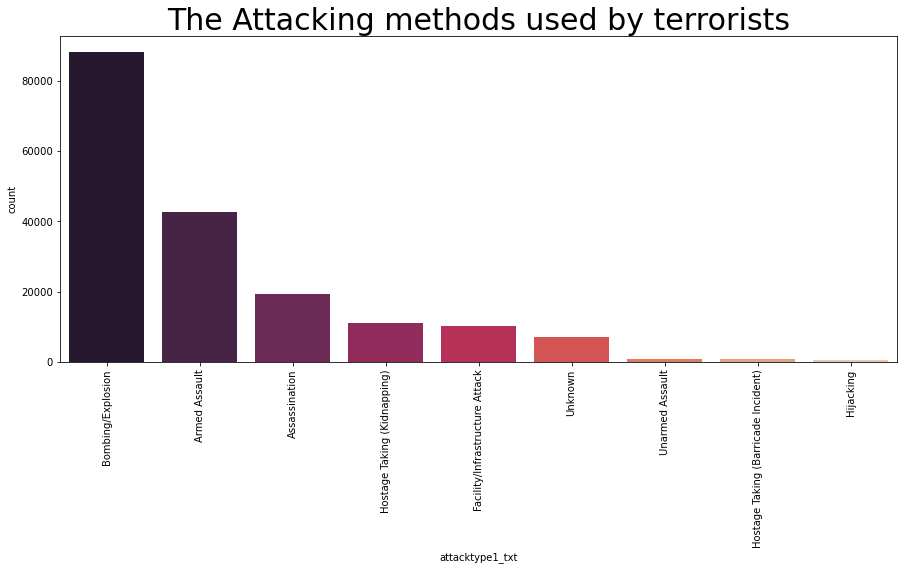

In [145]:
plt.subplots(figsize=(15,6))
sns.countplot('attacktype1_txt',data=data1,palette='rocket',order=data1['attacktype1_txt'].value_counts().index)
plt.title("The Attacking methods used by terrorists",fontsize=30)
plt.xticks(rotation=90)
plt.show()



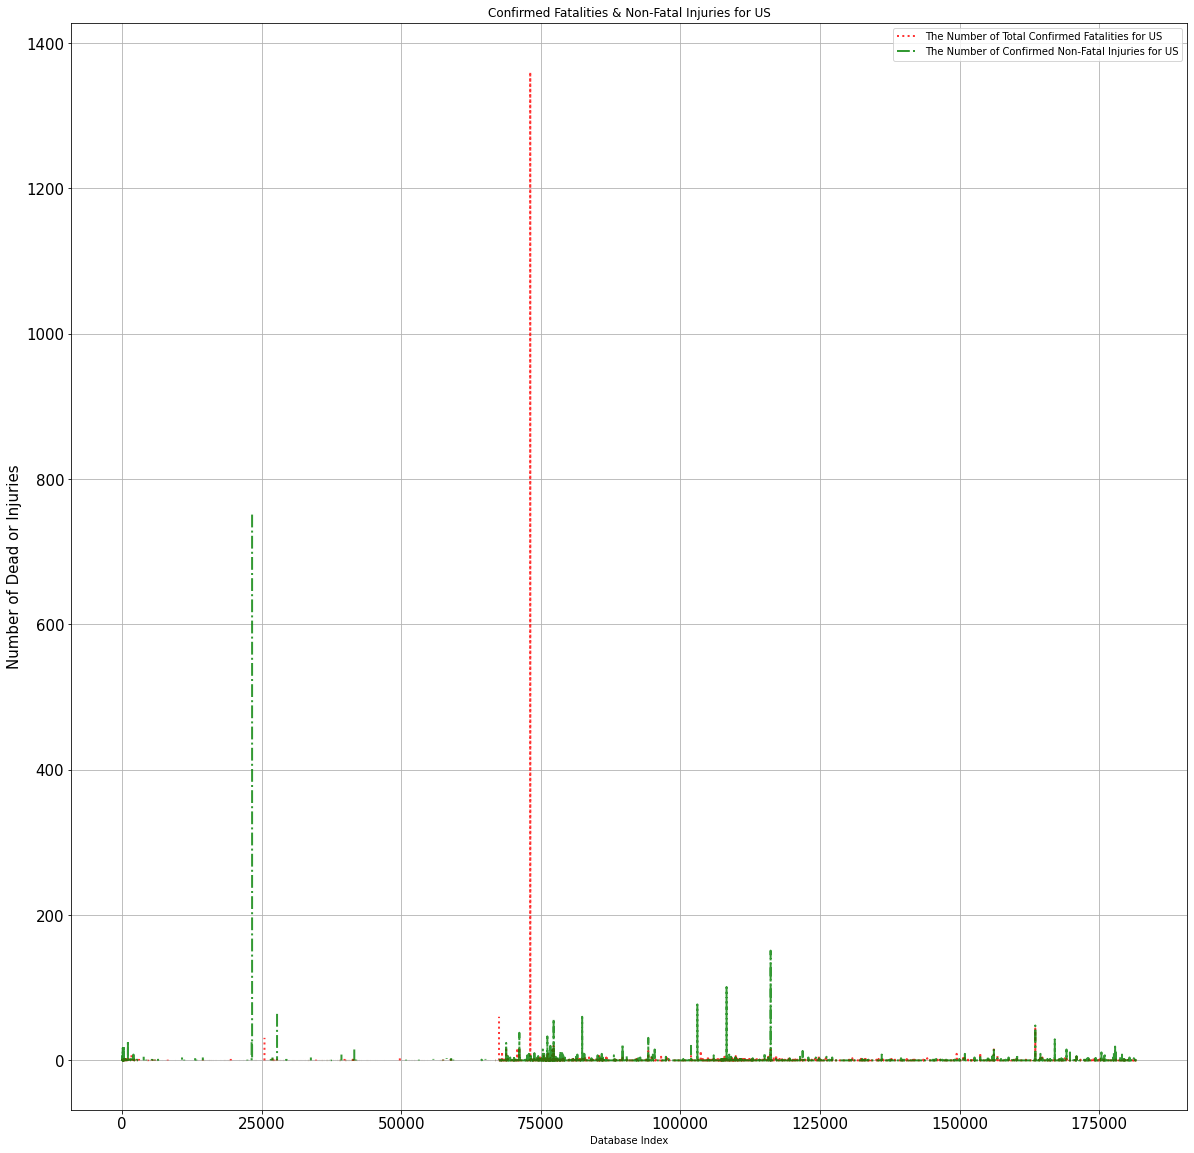

In [146]:
data1.nkillus.plot(kind = 'line', color = 'red', label = 'The Number of Total Confirmed Fatalities for US', linewidth = 2, alpha = 0.8, grid = True, 
                 linestyle = ':', figsize = (20,20), fontsize=15)
data1.nwoundus.plot(color = "green", label = 'The Number of Confirmed Non-Fatal Injuries for US', linewidth = 2, alpha = 0.8, grid = True, 
                 linestyle = '-.', figsize = (20,20), fontsize=15)

plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('Database Index', fontsize=10)              # label = name of label
plt.ylabel('Number of Dead or Injuries', fontsize=15)

plt.title('Confirmed Fatalities & Non-Fatal Injuries for US')            #plot title
plt.show()

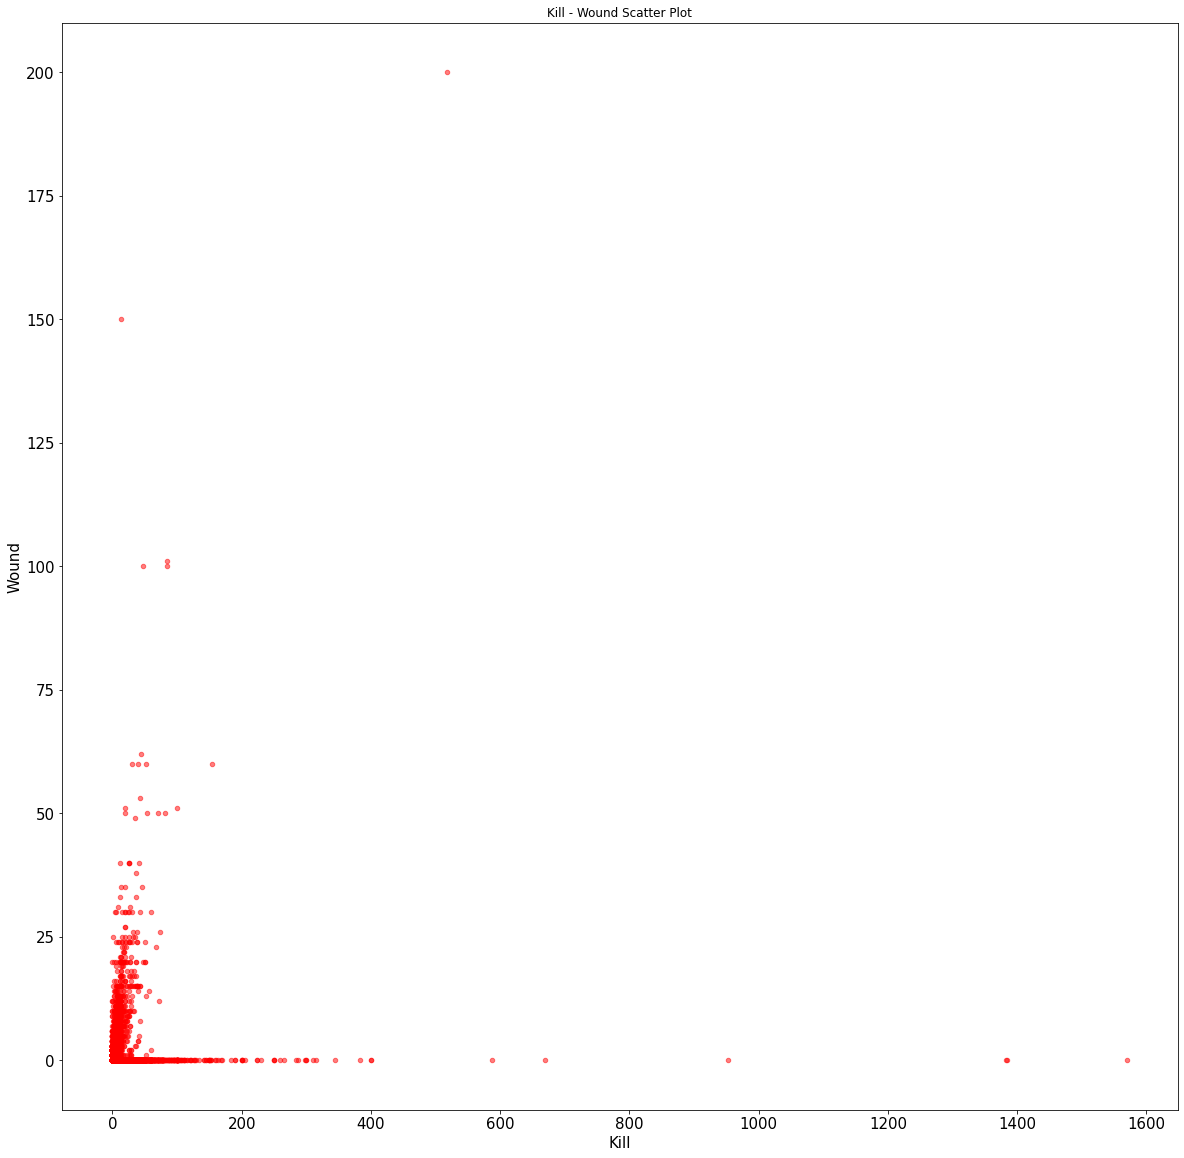

In [147]:
data1.plot(kind = 'scatter', x = 'nkill', y = 'nwoundte', alpha = 0.5, color = 'red', figsize = (20,20), fontsize=15)
plt.xlabel('Kill', fontsize=15)
plt.ylabel('Wound', fontsize=15)
plt.title('Kill - Wound Scatter Plot')
plt.show()

## Frequency of Terrorist Actions in Customized Region

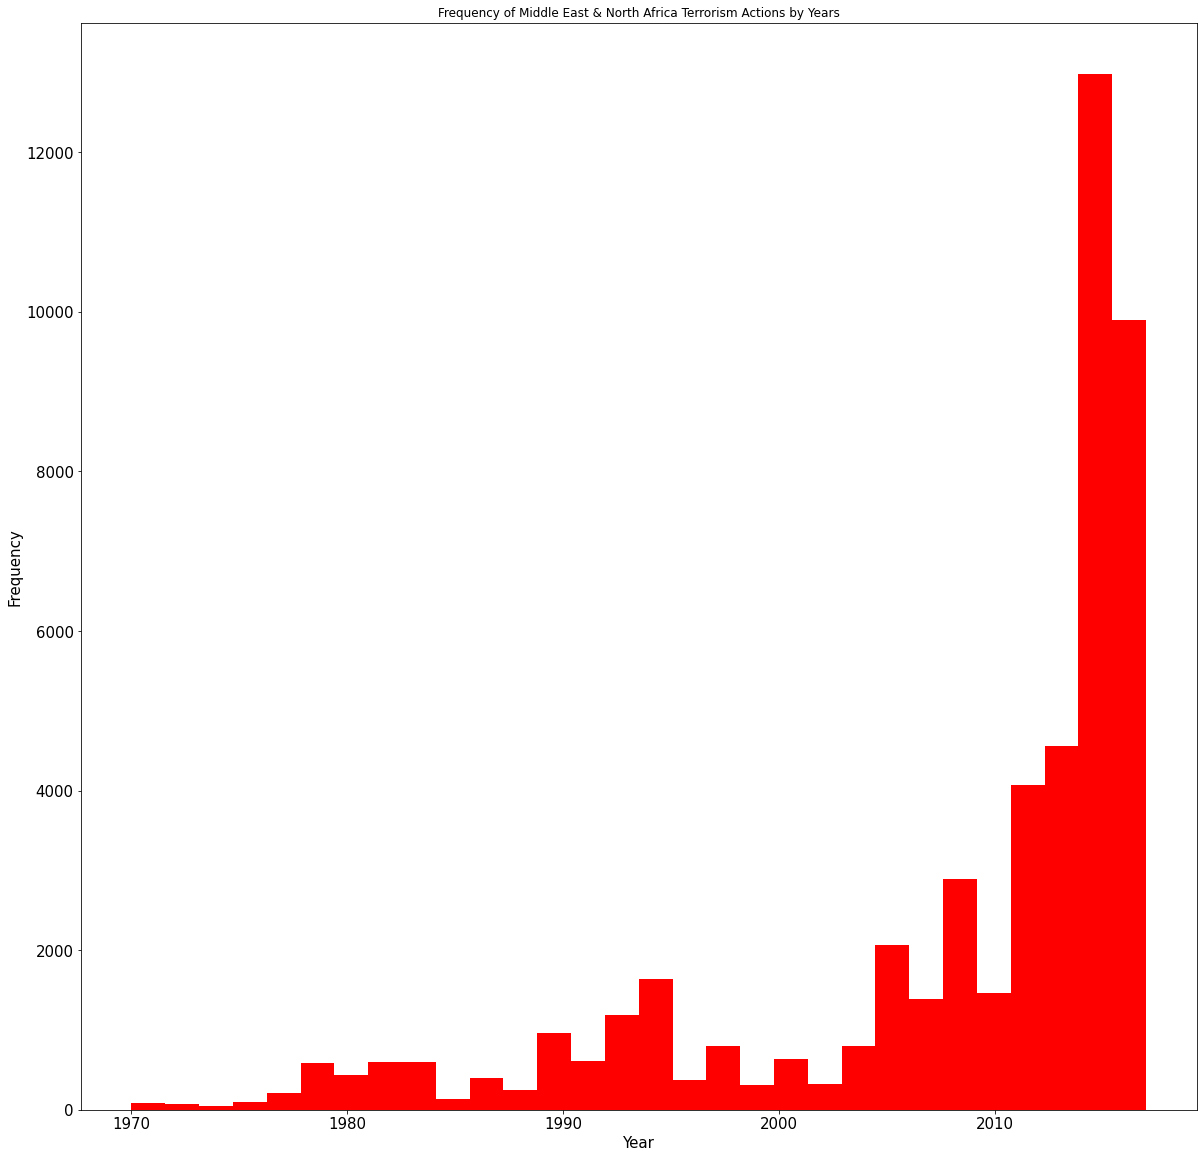

In [148]:
middleEastData = data1[data1['region'] == 10]
middleEastData.Year.plot(kind = 'hist', bins = 30, figsize = (20,20), color = 'red', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Frequency of Middle East & North Africa Terrorism Actions by Years')
plt.show()

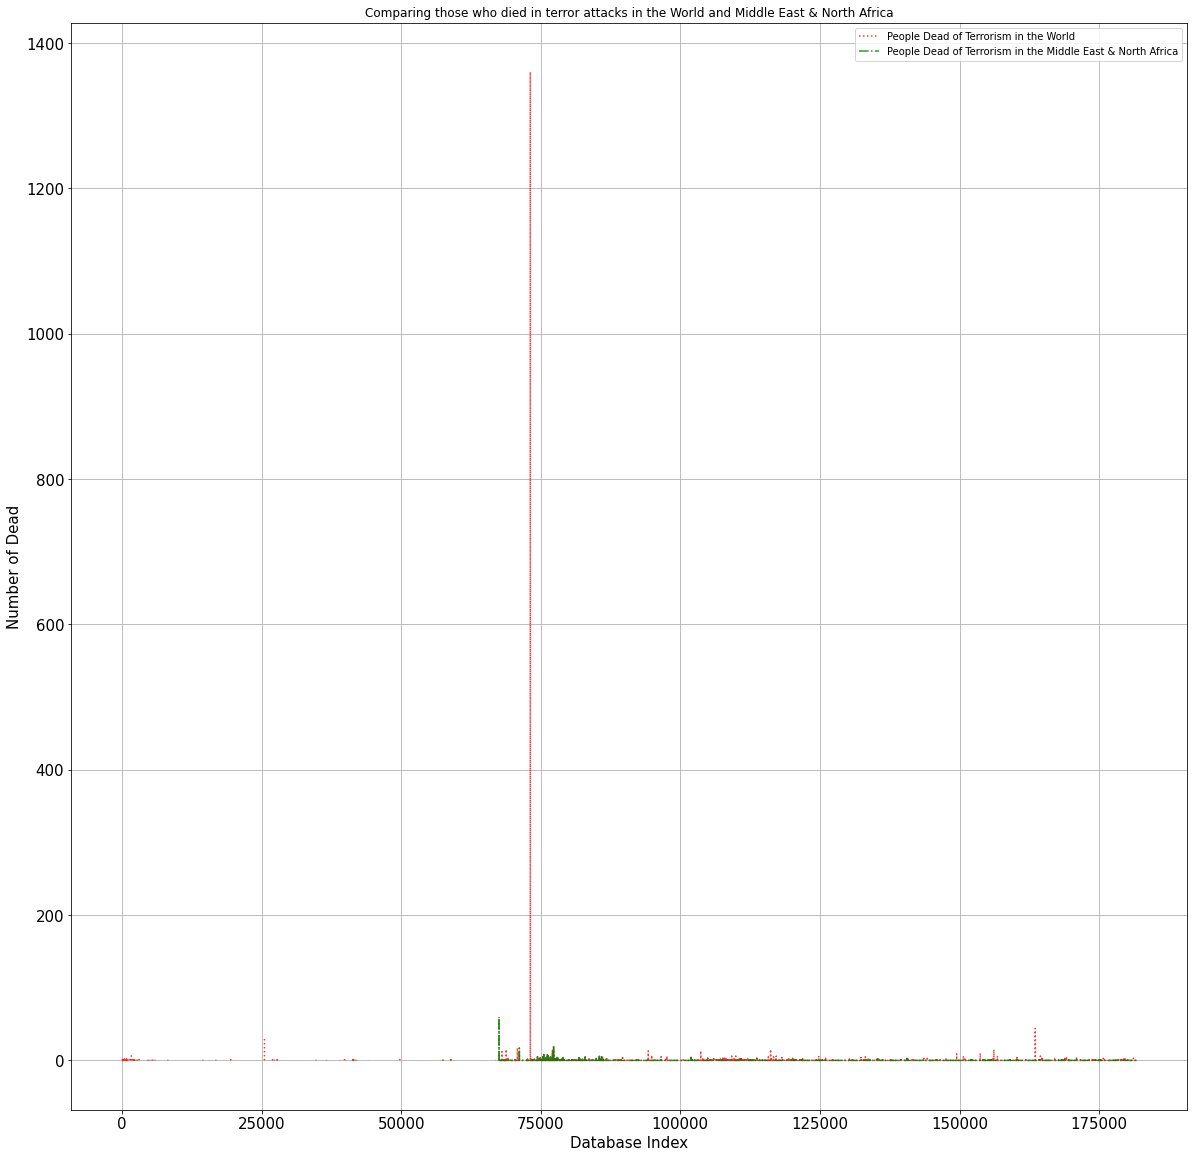

In [149]:
data1.nkillus.plot(kind = 'line', color = 'red', label = 'People Dead of Terrorism in the World', linewidth = 1.5, alpha = 0.8, grid = True, 
                 linestyle = ':', figsize = (20,20), fontsize=15)
middleEastData.nkillus.plot(color = "green", label = 'People Dead of Terrorism in the Middle East & North Africa', linewidth = 1.5, alpha = 0.8, 
                            grid = True, linestyle = '-.', figsize = (20,20), fontsize=15)

plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('Database Index', fontsize=15)              # label = name of label
plt.ylabel('Number of Dead', fontsize=15)

plt.title('Comparing those who died in terror attacks in the World and Middle East & North Africa')            #plot title
plt.show()

## Terrorist Attacks of a Particular year and their Locations

In [150]:
filterYear = data1['Year'] == 1970

In [151]:
filterData = data1[filterYear] # filter data
# filterData.info()
reqFilterData = filterData.loc[:,'city':'longitude'] #We are getting the required fields
reqFilterData = reqFilterData.dropna() # drop NaN values in latitude and longitude
reqFilterDataList = reqFilterData.values.tolist()
# reqFilterDataList

In [152]:

map = folium.Map(location = [0, 30], tiles='CartoDB positron', zoom_start=2)
# clustered marker
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]], popup = reqFilterDataList[point][0]).add_to(markerCluster)
map

## 84% of the terrorist attacks in 1970 were carried out on the American continent. In 1970, the Middle East and North Africa, currently the center of wars and terrorist attacks, faced only one terrorist attack.

In [153]:
killData = data1.loc[:,'nkill']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))# drop the NaN values

Number of people killed by terror attack: 411868


## Let's look at what types of attacks these deaths were made of.

In [154]:
attackData = data1.loc[:,'attacktype1':'attacktype1_txt']
# attackData
typeKillData = pd.concat([attackData, killData], axis=1)

In [155]:
typeKillFormatData = typeKillData.pivot_table(columns='attacktype1_txt', values='nkill', aggfunc='sum')
typeKillFormatData

attacktype1_txt,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
nkill,160297.0,24920.0,157321.0,3642.0,3718.0,4478.0,24231.0,880.0,32381.0


In [156]:
typeKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, nkill to nkill
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Armed Assault                        1 non-null      float64
 1   Assassination                        1 non-null      float64
 2   Bombing/Explosion                    1 non-null      float64
 3   Facility/Infrastructure Attack       1 non-null      float64
 4   Hijacking                            1 non-null      float64
 5   Hostage Taking (Barricade Incident)  1 non-null      float64
 6   Hostage Taking (Kidnapping)          1 non-null      float64
 7   Unarmed Assault                      1 non-null      float64
 8   Unknown                              1 non-null      float64
dtypes: float64(9)
memory usage: 80.0+ bytes


<ipython-input-157-e299daed714b>:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(values, startangle=90, autopct='%.2f%%')


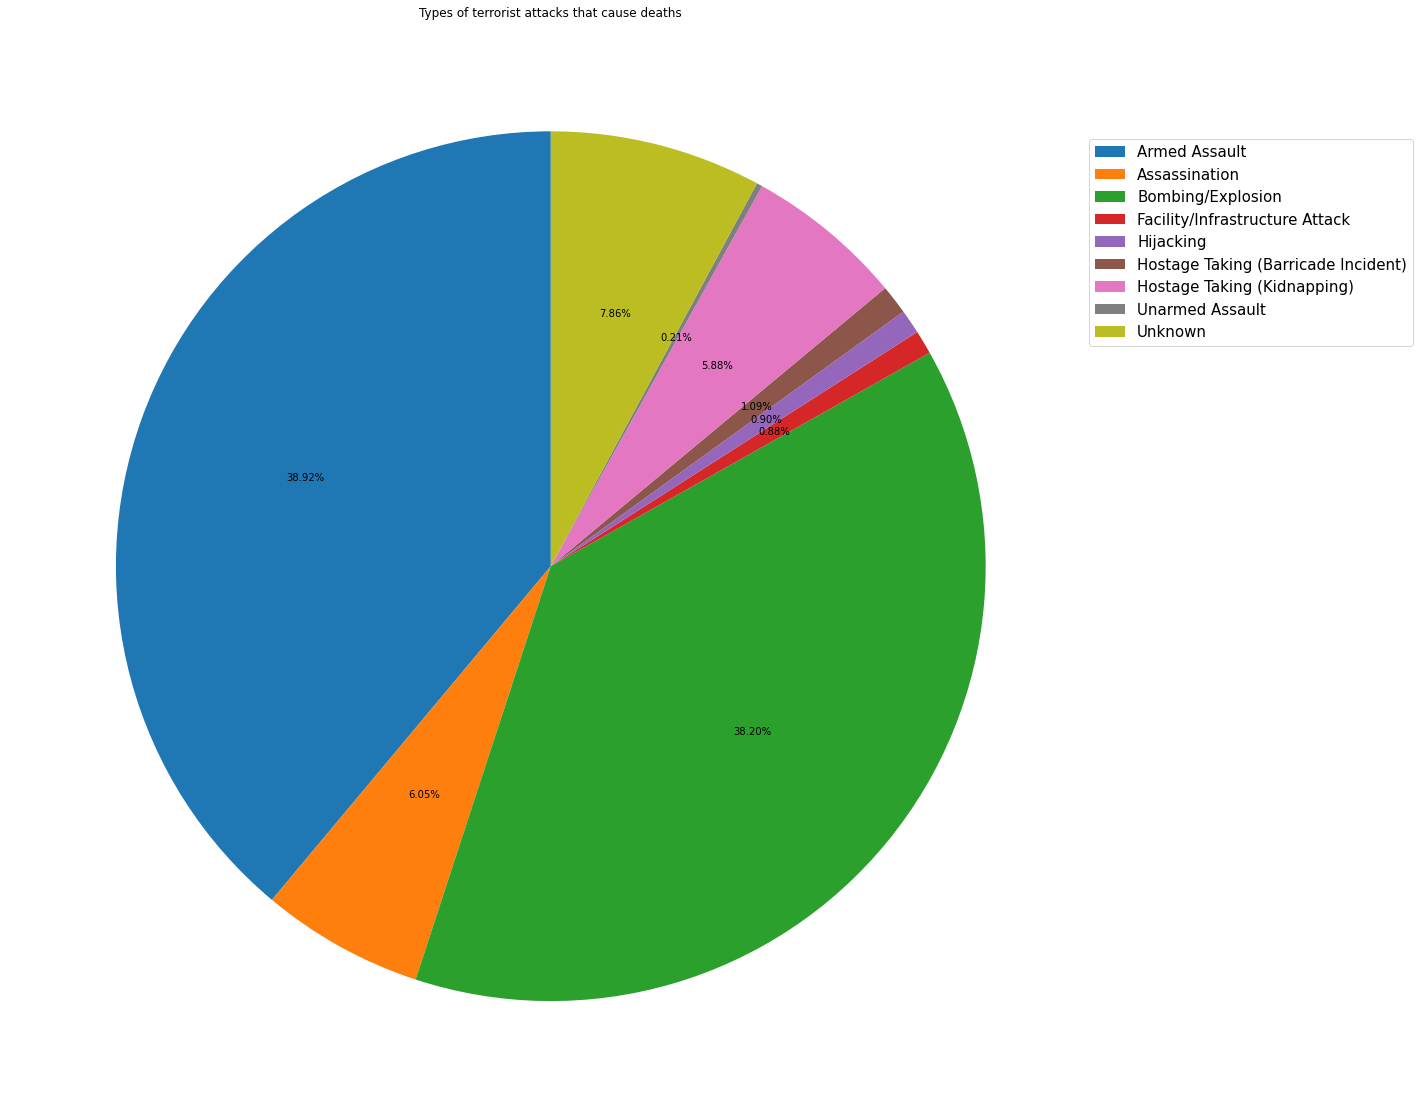

In [157]:

labels = typeKillFormatData.columns.tolist() # convert line to list
transpoze = typeKillFormatData.T # transpoze
values = transpoze.values.tolist()
fig, ax = plt.subplots(figsize=(20, 20), subplot_kw=dict(aspect="equal"))
plt.pie(values, startangle=90, autopct='%.2f%%')
plt.title('Types of terrorist attacks that cause deaths')
plt.legend(labels, loc='upper right', bbox_to_anchor = (1.3, 0.9), fontsize=15) # location legend
plt.show()

In [158]:
countryData = data1.loc[:,'country':'country_txt']
# countyData
countryKillData = pd.concat([countryData, killData], axis=1)

In [159]:
countryKillFormatData = countryKillData.pivot_table(columns='country_txt', values='nkill', aggfunc='sum')
countryKillFormatData


country_txt,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
nkill,39384.0,42.0,11066.0,0.0,3043.0,0.0,490.0,37.0,23.0,30.0,...,1.0,0.0,1500.0,97.0,1.0,8776.0,119.0,324.0,70.0,154.0


In [160]:
countryKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, nkill to nkill
Columns: 205 entries, Afghanistan to Zimbabwe
dtypes: float64(205)
memory usage: 1.6+ KB


In [161]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size

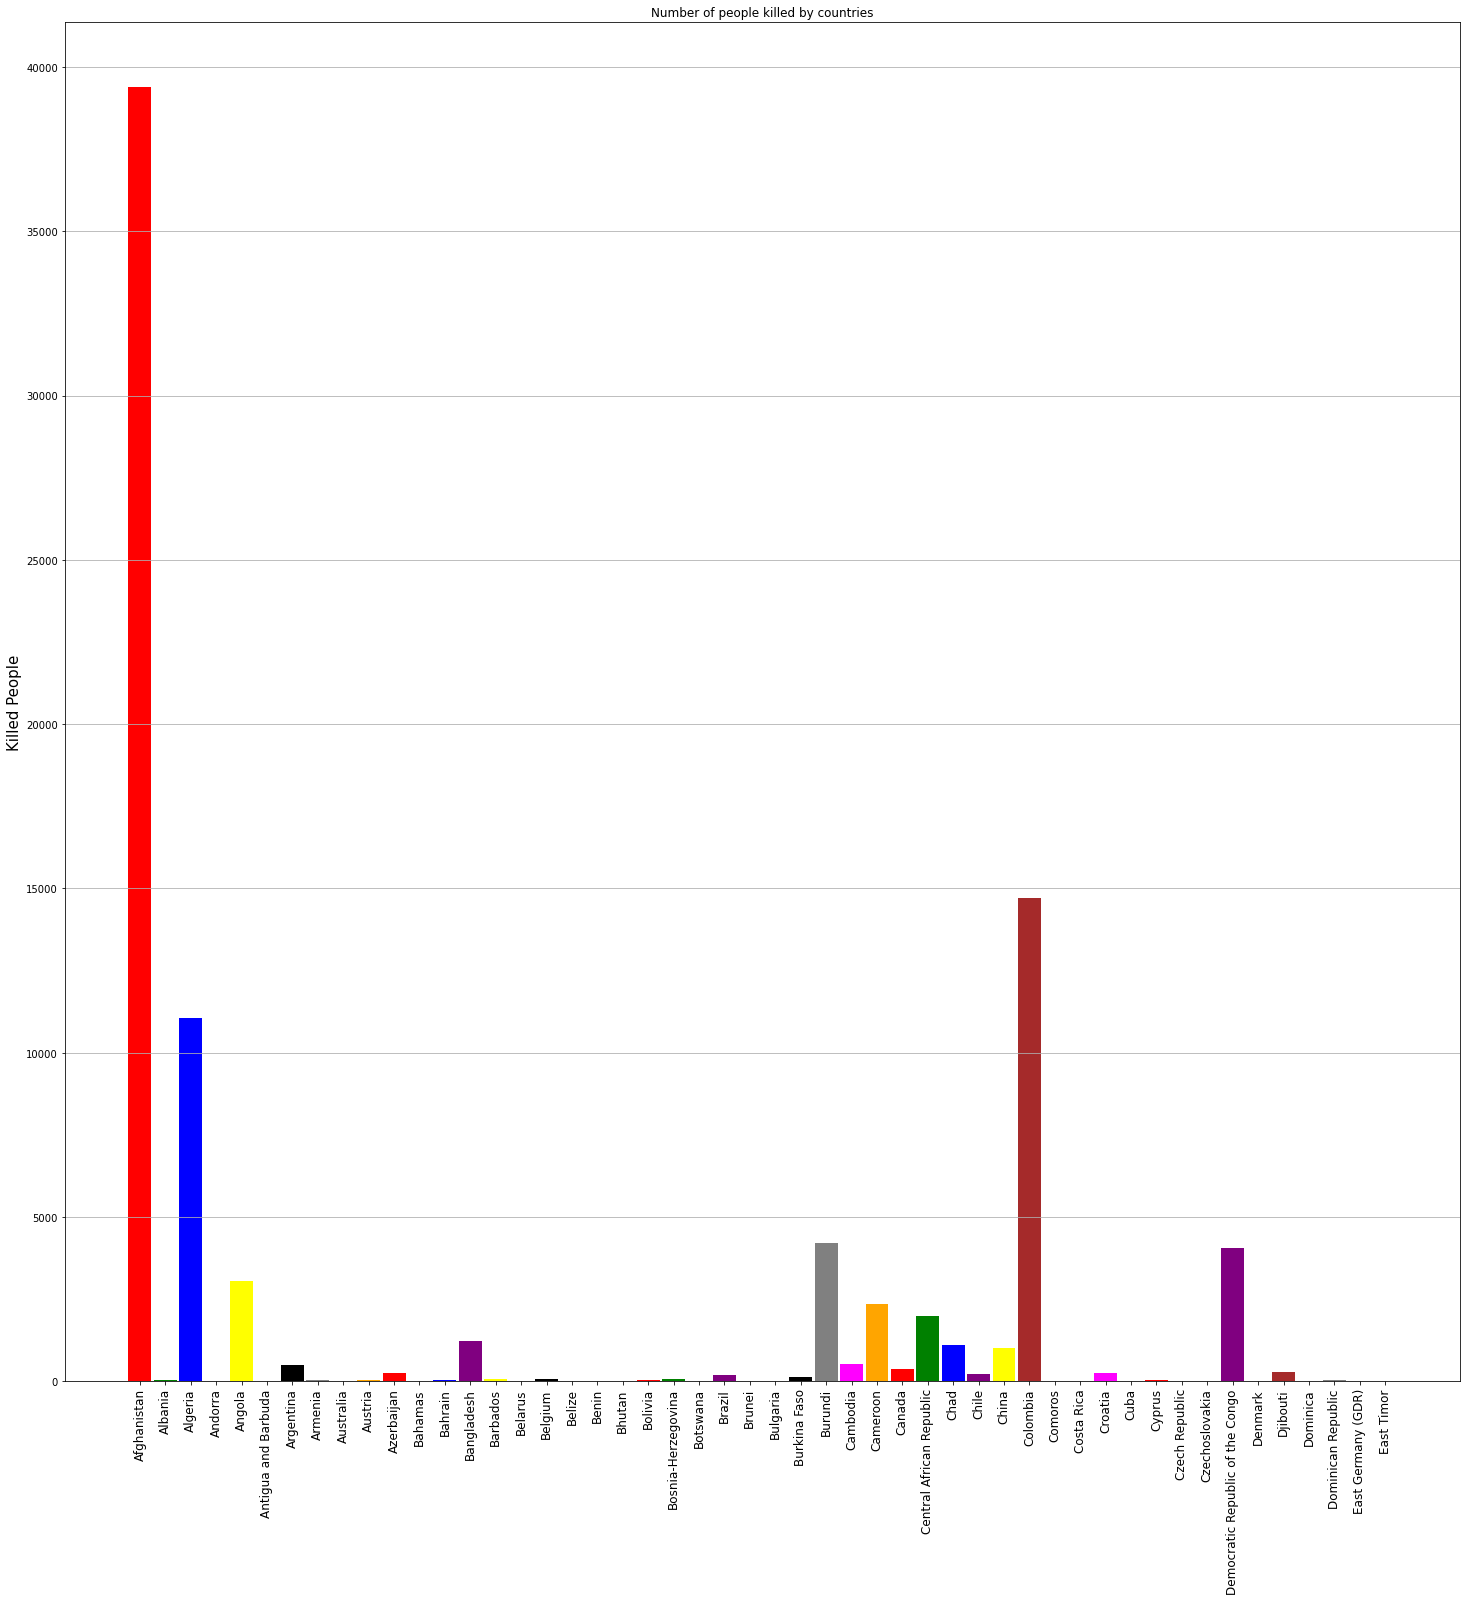

In [162]:
labels = countryKillFormatData.columns.tolist()
labels = labels[:50] #50 bar provides nice view
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[:50]
values = [int(i[0]) for i in values] # convert float to int
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange'] # color list for bar chart bar color 
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=15)
plt.xticks(index, labels, fontsize=12, rotation=90)
plt.title('Number of people killed by countries')
# print(fig_size)
plt.show()

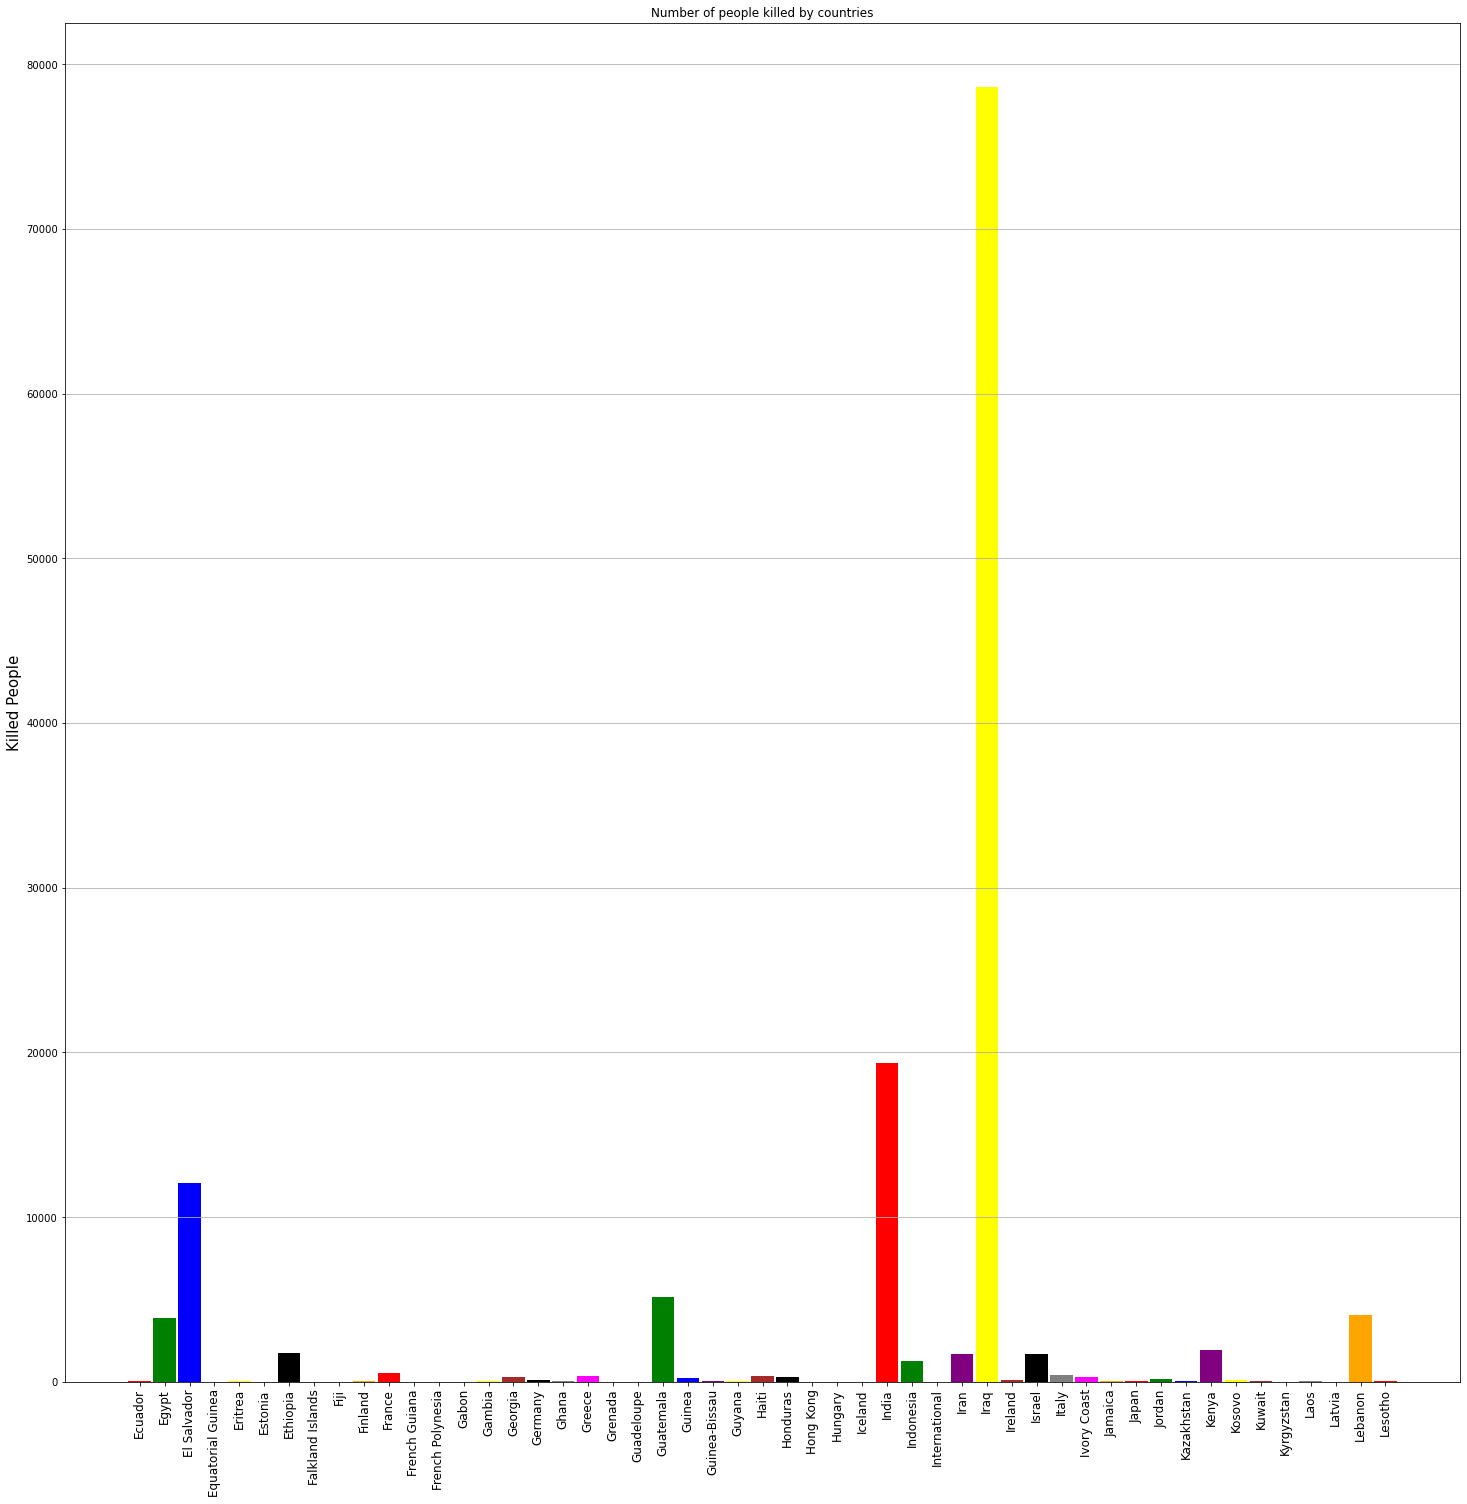

In [163]:
labels = countryKillFormatData.columns.tolist()
labels = labels[50:101]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[50:101]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=15)
plt.xticks(index, labels, fontsize=12, rotation=90)
plt.title('Number of people killed by countries')
plt.show()

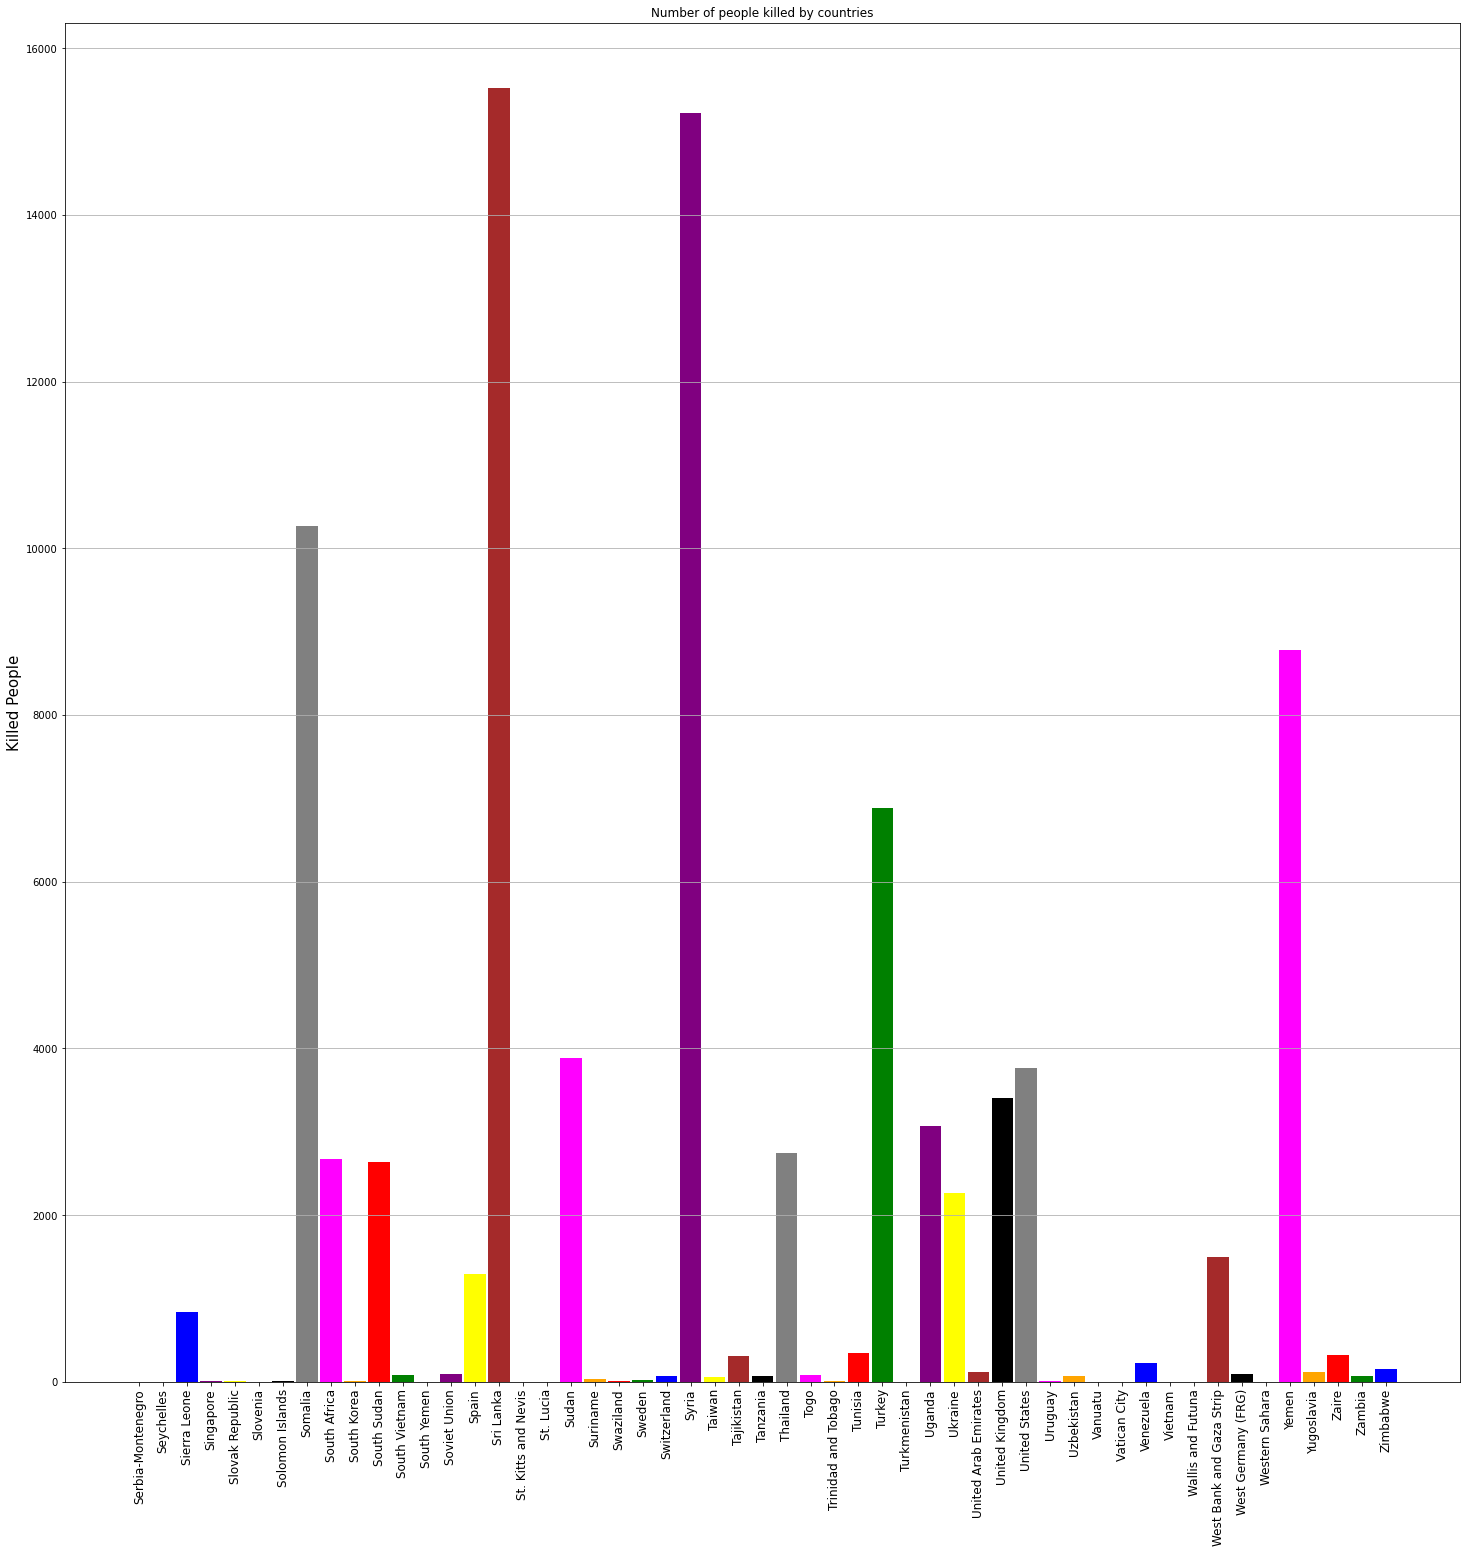

In [164]:
labels = countryKillFormatData.columns.tolist()
labels = labels[152:206]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[152:206]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=15)
plt.xticks(index, labels, fontsize=12, rotation=90)
plt.title('Number of people killed by countries')
plt.show()